# Building a Logistic Regression

Create a logistic regression based on the bank data provided. 

The data is based on the marketing campaign efforts of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).

Note that the first column of the dataset is the index.

Source: [Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014


## Import the relevant libraries

In [2]:
import statsmodels.api as sm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load the data

Load the ‘Example_bank_data.csv’ dataset.

In [3]:
raw_data = pd.read_csv('Example_bank_data.csv')

We want to know whether the bank marketing strategy was successful, so we need to transform the outcome variable into 0s and 1s in order to perform a logistic regression.

In [4]:
raw_data

,Unnamed: 0,duration,y
0,0,117,no
1,1,274,yes
2,2,167,no
3,3,686,yes
4,4,157,no
...,...,...,...
513,513,204,no
514,514,806,yes
515,515,290,no
516,516,473,yes


In [6]:
raw_data.describe()

,Unnamed: 0,duration
count,518.000000,518.000000
mean,258.500000,382.177606
std,149.677988,344.295990
min,0.000000,9.000000
25%,129.250000,155.000000
50%,258.500000,266.500000
75%,387.750000,482.750000
max,517.000000,2653.000000


In [13]:
data = raw_data.copy()
data['y'] = data['y'].map({'yes': 1, 'no': 0}) # map
# i think the first column is an error
print(data.columns.tolist())
data = data.drop(['Unnamed: 0'], axis=1)
data.head()

['Unnamed: 0', 'duration', 'y']


,duration,y
0,117,0
1,274,1
2,167,0
3,686,1
4,157,0


### Declare the dependent and independent variables

In [14]:
x1 = data['duration']
y = data['y']

### Simple Logistic Regression

Run the regression and visualize it on a scatter plot (no need to plot the line).

In [ ]:
x = sm.add_constant(x1)
result = sm.Logit(y,x).fit()

Optimization terminated successfully.
         Current function value: 0.546118
         Iterations 7


In [16]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  518
Model:                          Logit   Df Residuals:                      516
Method:                           MLE   Df Model:                            1
Date:                Wed, 23 Jul 2025   Pseudo R-squ.:                  0.2121
Time:                        00:58:23   Log-Likelihood:                -282.89
converged:                       True   LL-Null:                       -359.05
Covariance Type:            nonrobust   LLR p-value:                 5.387e-35
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.7001      0.192     -8.863      0.000      -2.076      -1.324
duration       0.0051      0.001      9.159      0.000       0.004       0.006
==============================================================================
"""

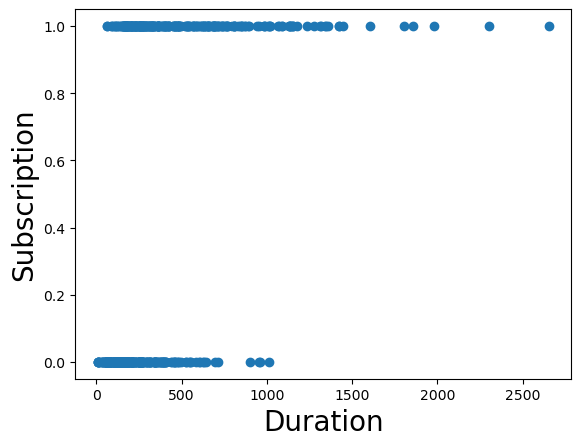

In [ ]:
plt.scatter(x1,y,color = 'C0')
plt.xlabel('Duration', fontsize = 20)
plt.ylabel('Subscription', fontsize = 20)
plt.show()